In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import matplotlib.pyplot as plt
# https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html

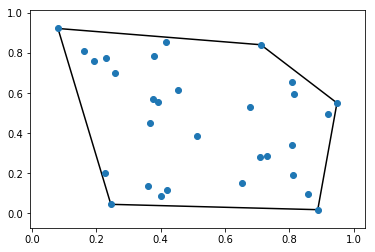

In [7]:
#plot it
convex_hull_plot_2d(hull)
plt.show()

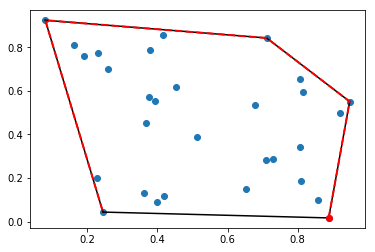

In [5]:
# long way
plt.plot(points[:,0], points[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

Delaunay triangulation is a subdivision of a set of points into a non-overlapping set of triangles, such that no point is inside the circumcircle of any triangle.

In [14]:
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)
points[tri.simplices]

array([[[1. , 0. ],
        [1. , 1. ],
        [0. , 0. ]],

       [[1. , 1. ],
        [0. , 1.1],
        [0. , 0. ]]])

Delaunay triangulation is a subdivision of a set of points into a non-overlapping set of triangles, such that no point is inside the circumcircle of any triangle.

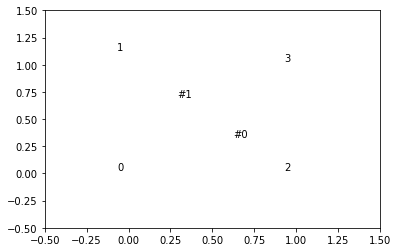

In [12]:
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.show()

In [26]:
from scipy.spatial import KDTree
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
tree = KDTree(points)
print(tree.query([0.1, 0.1]), tree.query([1.4, 1.4]))

(0.14142135623730953, 0) (0.5656854249492379, 4)


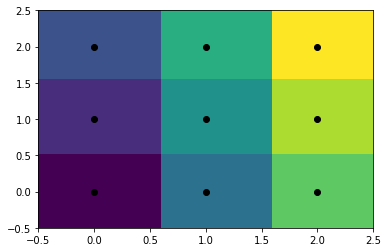

In [17]:
x = np.linspace(-0.5, 2.5, 31)
y = np.linspace(-0.5, 2.5, 33)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]
plt.pcolor(x, y, tree.query(xy)[1].reshape(33, 31))
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()

In [18]:
from scipy.spatial import Voronoi, voronoi_plot_2d


In [19]:
vor = Voronoi(points)
vor.vertices

array([[0.5, 0.5],
       [1.5, 0.5],
       [0.5, 1.5],
       [1.5, 1.5]])

In [20]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [3, 2, 0, 1],
 [2, -1, 0],
 [3, -1, 1]]

In [21]:
vor.ridge_points

array([[0, 1],
       [0, 3],
       [6, 3],
       [6, 7],
       [3, 4],
       [5, 8],
       [5, 2],
       [5, 4],
       [8, 7],
       [2, 1],
       [4, 1],
       [4, 7]], dtype=int32)

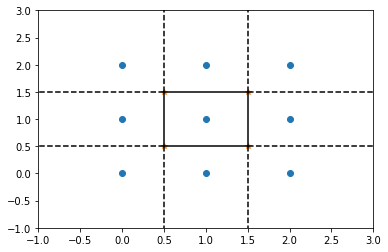

In [24]:
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(vor.vertices[:, 0], vor.vertices[:, 1], '*')
plt.xlim(-1, 3); plt.ylim(-1, 3)
for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')
center = points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.any(simplex < 0):
        i = simplex[simplex >= 0][0] # finite end Voronoi vertex
        t = points[pointidx[1]] - points[pointidx[0]]  # tangent
        t = t / np.linalg.norm(t)
        n = np.array([-t[1], t[0]]) # normal
        midpoint = points[pointidx].mean(axis=0)
        far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
        plt.plot([vor.vertices[i,0], far_point[0]],
        [vor.vertices[i,1], far_point[1]], 'k--')
plt.show()        

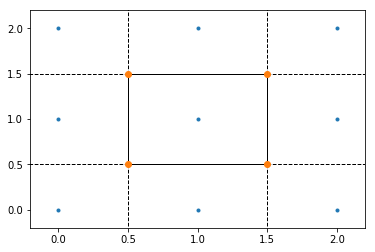

In [25]:
voronoi_plot_2d(vor)
plt.show()